## Jupyter Notebook for Ozzie's McNulty project on a Kaggle classification project  
## Ozzie Liu - ozzie@ozzieliu.com  
2/19/2016

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

## Loading the Training Data

In [2]:
train = pd.read_csv('train.csv')

In [82]:
train.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [83]:
len(train[train.target==1])

87021

In [84]:
len(train[train.target==0])

27300

In [85]:
87021+27300

114321

## Loading the Test Data

In [3]:
test = pd.read_csv('test.csv')

# EDA

In [ ]:
## Get basic stats for each column
column_describe = train.describe()
column_describe

In [ ]:
## Save it in a CSV file
column_describe.to_csv('descriptions.csv', index = False)

## Skewness and Kurtosis

In [ ]:
## Calculate skewness and kurtosis and save it to csv file too
skewness = train.skew(axis=0)
kurt = train.kurtosis()
more_describe = pd.DataFrame({'skewness':skewness, 'kurtosis':kurt})
more_describe.to_csv('skewness.csv')

## Correlation Heatmap
To see which features are correlated with one another

In [4]:
corr = train.drop(['ID'], axis = 1).corr()

In [5]:
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

/Users/Ozzie/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


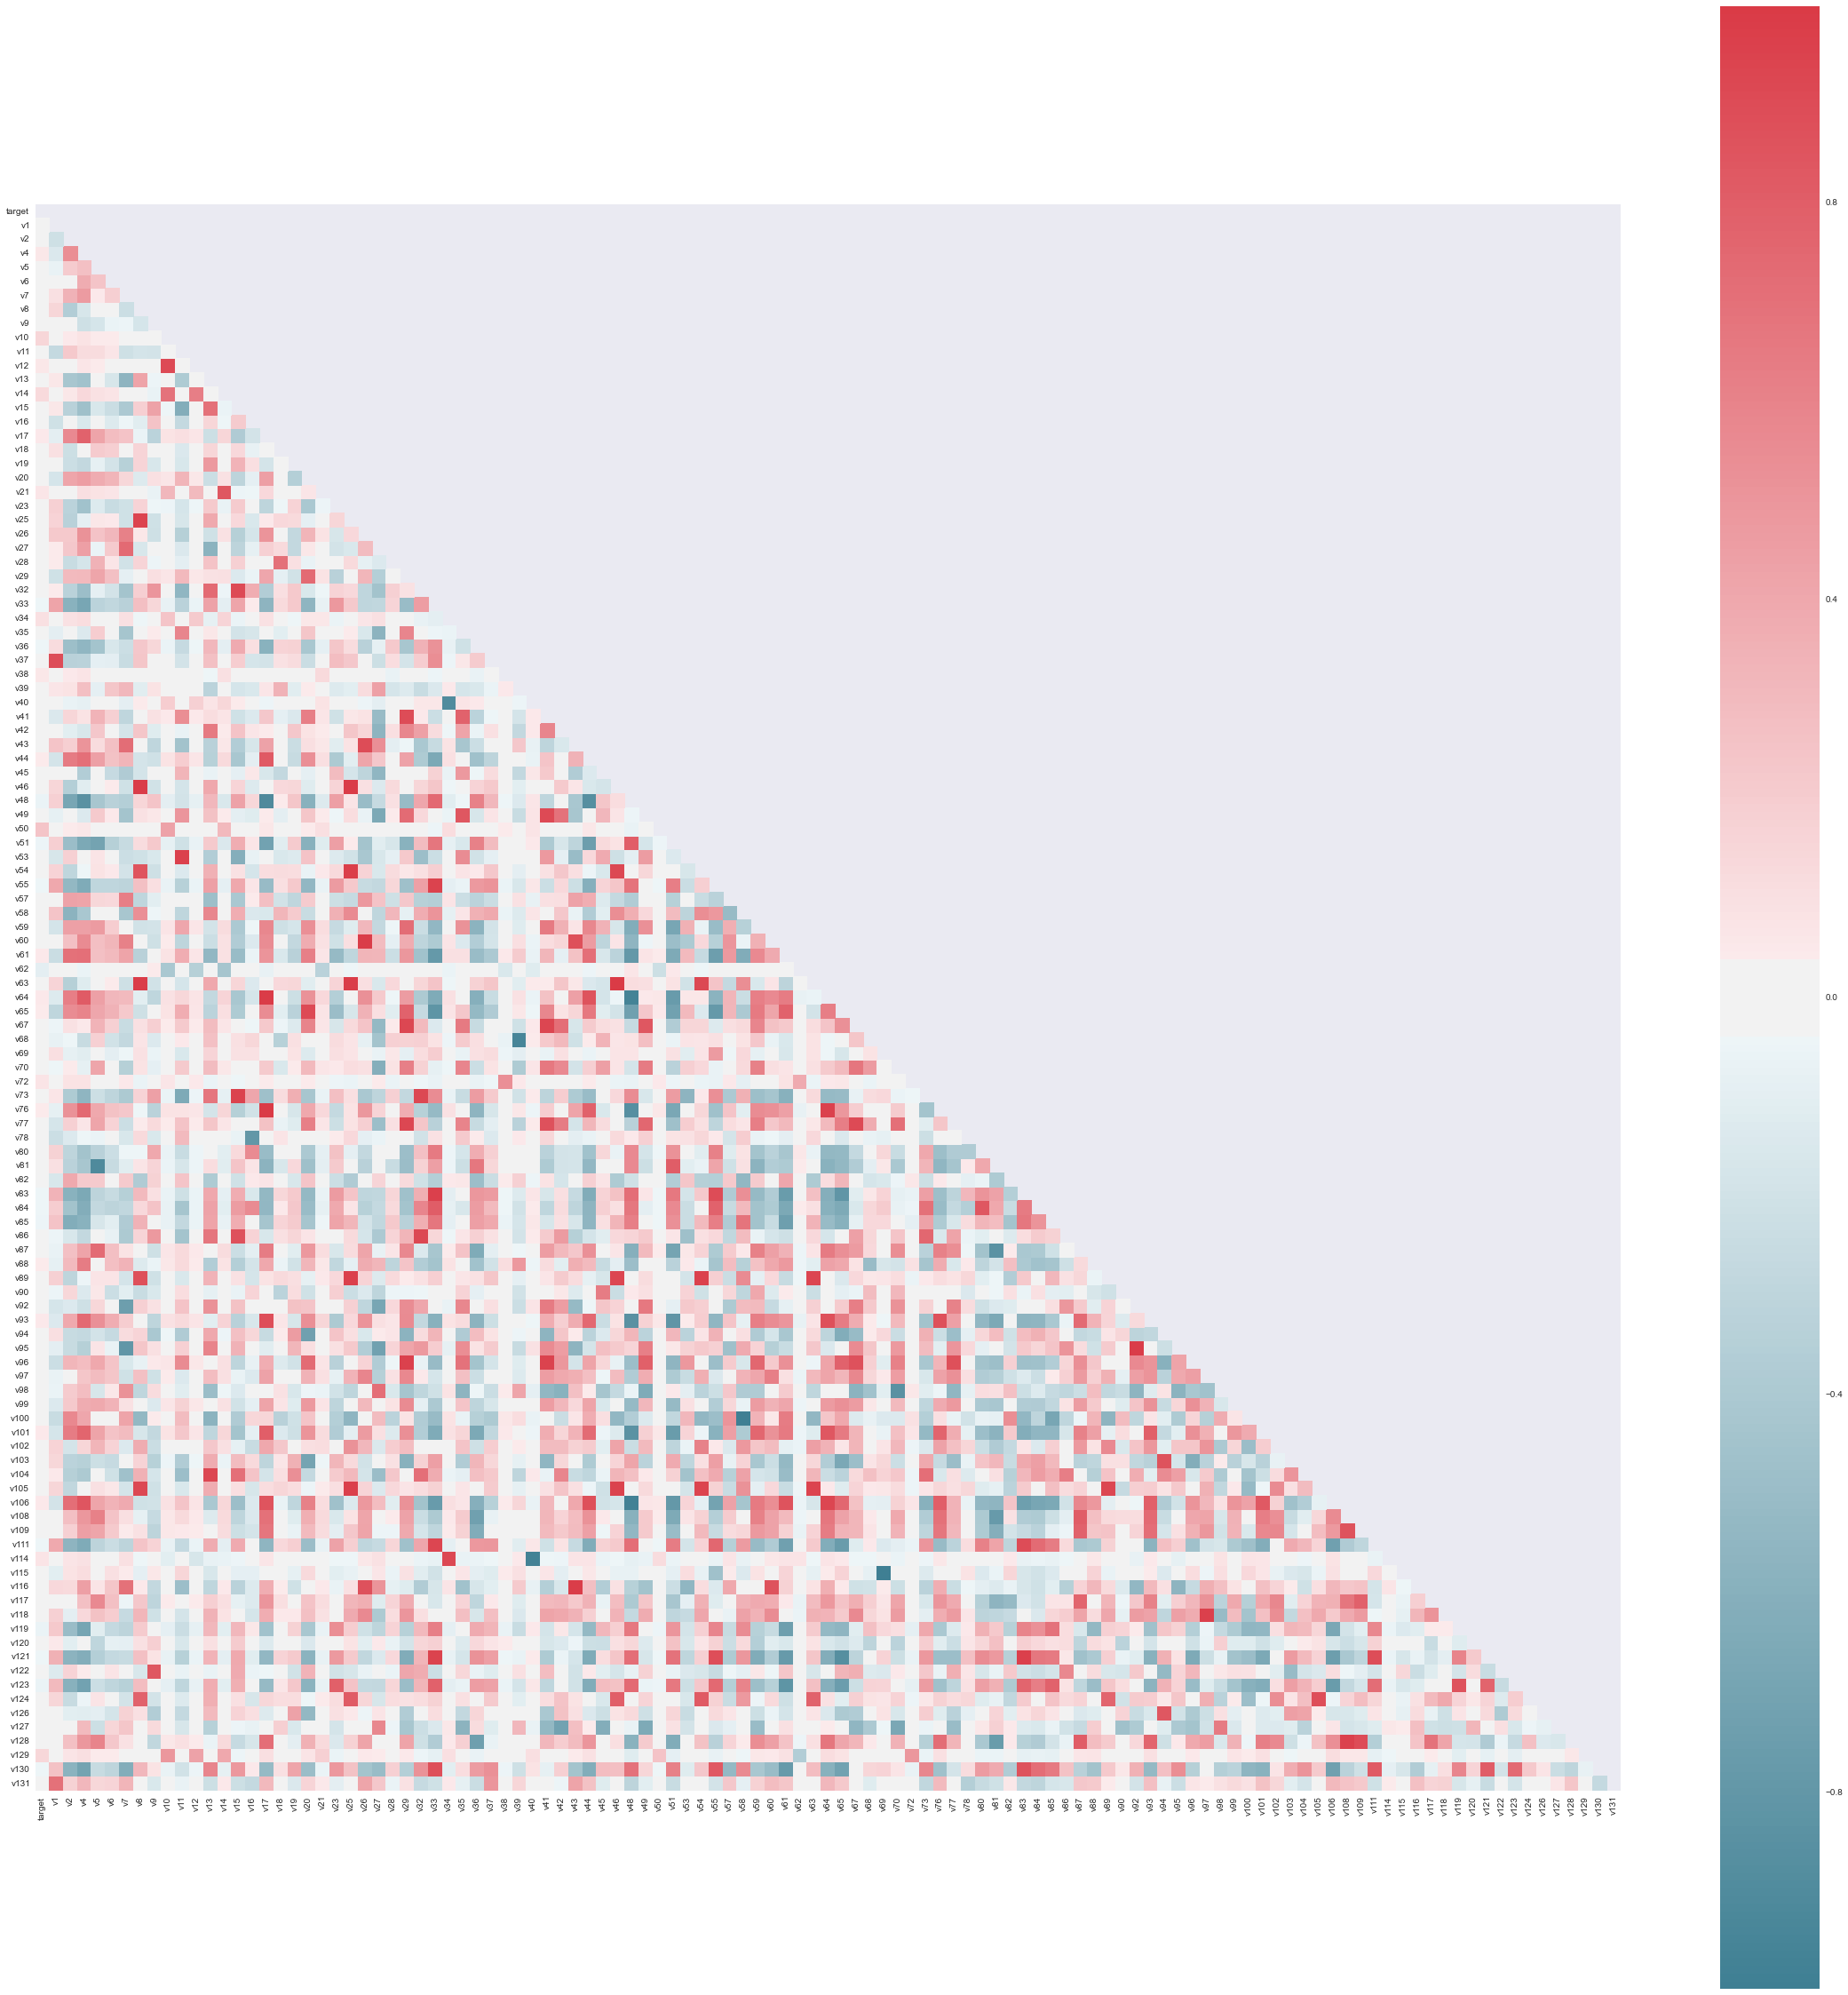

In [6]:
f, ax = plt.subplots(figsize=(40,40))
cmap = seaborn.diverging_palette(220, 10, as_cmap=True)

fig = seaborn.heatmap(corr, mask=mask, cmap=cmap, vmax = 0.3, square = True, ax = ax)

In [ ]:
## Save the heatmap locally
fig.get_figure().savefig('heatmap.png')

In [ ]:
## See which pairs actually have correlations
target_correlation= corr['target']
target_correlation[target_correlation > 0.1]
target_correlation[target_correlation < -0.05]

# Data Wrangling / ETL

### 1 - Complete Cases

In [7]:
train_1 = train.dropna(axis = 0)

In [8]:
train_1_y = train_1.target
train_1_X = train_1.drop(['ID', 'target'], 1)

In [7]:
# train_1_X.head()

### 2 - Separating Categorical and Numerical Features

In [9]:
train_set_size = len(train)

In [10]:
train_2_ID = train.ID
train_2_target = train.target
test_2_ID = test.ID

In [11]:
train_2 = train.drop(['ID', 'target'], axis = 1)
test_2 = test.drop(['ID'], axis = 1)
transformer_2 = pd.concat([train_2, test_2], 0)

In [28]:
transformer_2

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,...,8.000000,1.989780,3.575369e-02,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,...,NaN,NaN,5.988956e-01,AF,NaN,NaN,1.957825,0,NaN,NaN
2,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,...,9.333333,2.477596,1.345191e-02,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,...,7.018256,1.812795,2.267384e-03,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,1.050328,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN
5,NaN,NaN,C,NaN,8.856791,NaN,NaN,0.359993,NaN,1.050328,...,NaN,NaN,4.986116e-02,X,NaN,NaN,1.536222,0,NaN,NaN
6,0.899806,7.312995,C,3.494148,9.946200,1.926070,1.770427,0.066251,5.011287,2.341356,...,3.476299,1.992594,8.375832e-02,BJ,3.276100,1.623298,2.266575,0,2.263736,0.970873
7,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,1.838074,...,NaN,NaN,NaN,BY,NaN,NaN,NaN,0,NaN,NaN
8,2.078651,8.462619,NaN,3.739030,5.265636,1.573033,2.303371,0.015869,11.111111,4.463894,...,8.148148,1.875560,1.865950e-02,S,1.159637,5.582865,1.105283,0,1.170731,3.333334
9,1.144802,5.880606,C,3.244469,9.538384,2.500001,1.559405,0.412610,9.977529,2.363238,...,7.325843,4.896617,8.943653e-03,E,1.344550,1.601176,1.928009,0,3.174603,1.000000


In [38]:
## Separate categorical and numerical features
categorical_columns = ['v3','v22','v24','v30','v31','v38','v47','v52','v56','v62','v66',
              'v71','v72','v74','v75','v79','v91','v107','v110','v112','v113',
              'v125','v129']
numerical_columns = [c for c in list(transformer_2.columns.values) if c not in categorical_columns]

In [39]:
## Create some new dataframes
categorical = transformer_2[categorical_columns]
numerical = transformer_2[numerical_columns]

In [40]:
## Inpute numerical features with mean
numerical_imp = numerical.fillna(numerical.mean())

In [41]:
## Pick only top 25 values in categorical features. Rest is "Other"
for col in categorical:
    if len(categorical[col].unique()) > 25:
        top25 = categorical[col].value_counts()[:25].index
#         print top25

        categorical[col] = categorical[col].apply(lambda x: x if x in top25 else 'Other')

## Impute categorical NA with mode
for col in categorical:
    most_common = categorical[col].mode().values[0]
    categorical_imp[col] = categorical[col].fillna(most_common)

Index([u'AGDF', u'YGJ', u'QKI', u'PWR', u'HZE', u'MNZ', u'PTO', u'ROZ', u'YOD',
       u'VZF', u'GBS', u'AJQ', u'WNI', u'HDD', u'NRT', u'QVR', u'YEP', u'PFR',
       u'VVI', u'PSE', u'NGS', u'ACWE', u'ADDF', u'WRI', u'ABOF'],
      dtype='object')
Index([u'BW', u'DI', u'AS', u'BZ', u'AW', u'DO', u'P', u'DP', u'CY', u'CN',
       u'BL', u'AF', u'BJ', u'AG', u'DX', u'DY', u'BV', u'U', u'DJ', u'N',
       u'DS', u'V', u'BX', u'DH', u'DF'],
      dtype='object')
Index([u'G', u'M', u'AC', u'AF', u'I', u'P', u'AG', u'X', u'V', u'T', u'W',
       u'B', u'Y', u'AB', u'N', u'AJ', u'AH', u'C', u'AE', u'Q', u'S', u'U',
       u'Z', u'L', u'AI'],
      dtype='object')
Index([u'BM', u'AK', u'BJ', u'CG', u'AP', u'BY', u'H', u'V', u'K', u'G', u'E',
       u'L', u'BW', u'B', u'AZ', u'BD', u'AR', u'CD', u'AC', u'Z', u'AN', u'A',
       u'CA', u'CJ', u'P'],
      dtype='object')


C:\Users\oz\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [43]:
## Create dummy variables for categorical features:
train_dummies = pd.DataFrame()
for col in categorical_imp:
    train_dummies = pd.concat([train_dummies, pd.get_dummies(categorical_imp[col], prefix=col)], axis = 1)

In [44]:
# Combine numerical and dummy categorical
train_2_X = pd.concat([numerical_imp, train_dummies], axis = 1)

In [45]:
test_2_X = train_2_X[train_set_size:]
train_2_X = train_2_X[:train_set_size]

## Use an unique value for missing numerical values

In [47]:
numerical_unique = numerical.fillna(-10)

In [67]:
train_3_X = pd.concat([numerical_unique, train_dummies], axis = 1)
test_3_X = train_3_X[train_set_size:]
train_3_X = train_3_X[:train_set_size]

# Modeling

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from skelarn

In [50]:
rnd = 42

In [85]:
classifiers=[
    ensemble.RandomForestClassifier(bootstrap=False, class_weight='auto', criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=rnd, verbose=0,
            warm_start=False),
    ensemble.ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features='sqrt', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=1e-5, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=rnd, verbose=0, warm_start=False),
    ensemble.GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=20, presort='auto',
              random_state=rnd, subsample=1.0, verbose=0,
              warm_start=False),
    ensemble.RandomForestClassifier(class_weight='auto', criterion='entropy',
            n_estimators=750, n_jobs=-1,
            oob_score=False, random_state=rnd, verbose=0,
            ),
]

classifier_name = ['Random Forest', 'Extra Trees', 'Gradient Boosting', 'Random Forest 750']

In [86]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(train_2_X, train_2_target, random_state = 42, test_size = 0.2)

accuracy = []
precision = []
recall = []
f1 = []
logloss = []
fpr_list = []
tpr_list = []
auc_list = []

for model in classifiers:
    print model
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_prediction))
    precision.append(metrics.precision_score(y_test, y_prediction))
    recall.append(metrics.recall_score(y_test, y_prediction))
    f1.append(metrics.f1_score(y_test, y_prediction))

    y_pp = model.predict_proba(X_test)[:,1]
    logloss.append(metrics.log_loss(y_test, y_pp))
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pp)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(metrics.auc(fpr, tpr))

RandomForestClassifier(bootstrap=False, class_weight='auto',
            criterion='entropy', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features='sqrt', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=1e-05, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              presort='auto', random_state=42, su

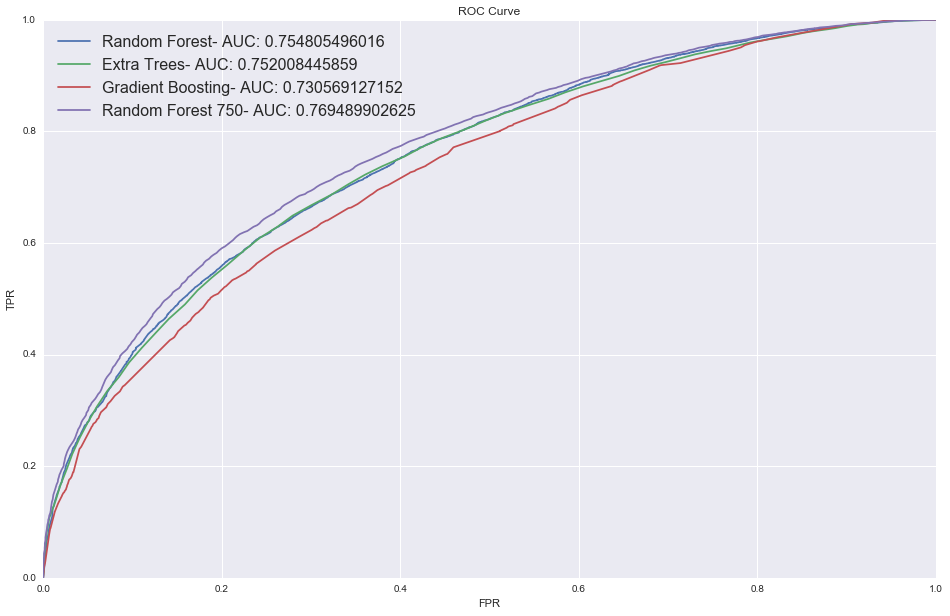

In [87]:
## Plot ROC Curve
plt.figure(figsize=(16,10))
for i in range(len(fpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], label = classifier_name[i] + '- AUC: ' + str(auc_list[i]))
plt.legend(loc = 0, fontsize = 16)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [99]:
result = model.predict_proba(test_2_X)[:, 1]

In [100]:
result

array([ 0.53733333,  0.75066667,  0.81733333, ...,  0.852     ,
        0.9       ,  0.608     ])

In [104]:
submission = pd.DataFrame({'ID':test_2_ID, 'PredictedProb':result})

In [106]:
submission.to_csv('submission1.csv', index = False)

## Categorical data only - dummy variables

In [35]:
## Split into test and train
X_train, X_test, y_train, y_test = train_test_split(train_dummies, train_target, test_size = 0.2)

In [36]:
forest = ensemble.RandomForestClassifier(n_estimators=100, random_state=42)

In [37]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [21]:
importances = forest.feature_importances_

In [23]:
feature_labels = X_train.columns

In [24]:
indices = np.argsort(importances)[::-1]

In [28]:
for f in range(X_train.shape[1]):
    print feature_labels[indices[f]], importances[indices[f]]

v30_C 0.0376323650138
v112_F 0.0275739902681
v52_J 0.0218722672393
v52_I 0.0214599827724
v52_F 0.020960641752
v112_I 0.0208306770033
v52_C 0.0204398651608
v52_D 0.0203856524013
v52_L 0.0201815002359
v52_G 0.0201725441459
v52_B 0.0201315661642
v52_E 0.0199969097096
v112_A 0.0199423875128
v112_N 0.0193494183365
v52_K 0.019077340837
v30_G 0.0190358057413
v52_A 0.0186424340535
v52_H 0.0184125200999
v66_C 0.0174098725374
v112_D 0.0173708454004
v24_E 0.0169714071542
v24_D 0.0161867501008
v30_D 0.0147815693388
v112_H 0.0147466478109
v112_E 0.0136204826549
v112_P 0.0135626683801
v24_C 0.0129277945497
v112_U 0.012557411838
v112_L 0.0122702314919
v66_A 0.0122406290563
v112_J 0.0121103932402
v112_R 0.0118397157626
v66_B 0.0118086872169
v112_T 0.0115257782789
v107_E 0.0115095359366
v91_G 0.0115002958934
v91_A 0.0114821818084
v107_C 0.0114386832921
v91_B 0.0111774944347
v107_B 0.0111715482492
v107_D 0.0111550745233
v91_C 0.0111357900687
v112_O 0.0110757422245
v71_B 0.0103838450163
v112_K 0.01020999

In [38]:
forest_prediction = forest.predict(X_test)

In [40]:
metrics.accuracy_score(y_test, forest_prediction)

0.74699322108025368

## Numerical Data only - complete cases

In [47]:
numerical = pd.concat([train_target, numerical], axis = 1)

In [48]:
complete_numerical = numerical.dropna()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(complete_numerical.drop('target', 1), complete_numerical.target, test_size = 0.2)
forest = ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [51]:
forest_predict_1 = forest.predict(X_test)
metrics.accuracy_score(y_test, forest_predict_1)

0.75881083672980099

## Numerical Data - imputed with mean

In [63]:
from sklearn.cross_validation import cross_val_score

In [62]:
numerical_imp = numerical.fillna(numerical.mean())
numerical_imp_y = numerical_imp.target
numerical_imp_X = numerical_imp.drop(['ID', 'target'], 1)

In [64]:
forest_2 = ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
cross_val_score(forest_2, numerical_imp_X, numerical_imp_y)

array([ 0.76295694,  0.76492508,  0.7616186 ])

## Numerical combined with dummy categorical, mean and mode imputed

In [70]:
# categorical_imp = categorical.fillna(categorical.mode())
combined_X = pd.concat([numerical_imp_X, train_dummies], 1)
combined_y = numerical.target

In [75]:
forest_3 = ensemble.RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1, oob_score=True)
# cross_val_score(forest_3, combined_X, combined_y)

In [77]:
forest_3.fit(combined_X, combined_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [79]:
cross_val_score(forest_3, combined_X, combined_y)

array([ 0.78166741,  0.7839767 ,  0.7823497 ])

## Grid Search

In [92]:
from sklearn.grid_search import GridSearchCV

In [93]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(combined_X, combined_y)
print CV_rfc.best_params_

{'max_features': 'sqrt', 'n_estimators': 700}
